In [1]:
sampler_size = 100000

In [2]:
!pip install zfit==0.16.0 
# Installing the latest stable version of zfit
#!pip install mplhep

In [3]:
! pip show zfit

Name: zfit
Version: 0.16.0
Summary: scalable pythonic model fitting for high energy physics
Home-page: https://github.com/zfit/zfit
Author: Jonas Eschle <Jonas.Eschle@cern.ch>, Albert Puig <apuignav@gmail.com>, Rafael Silva Coutinho <rsilvaco@cern.ch>, Matthieu Marinangeli <matthieu.marinangeli@cern.ch>
Author-email: None
License: BSD-3-Clause
Location: /home/carlos/.local/lib/python3.8/site-packages
Requires: dill, iminuit, zfit-interface, pydantic, jacobi, attrs, numpy, hist, frozendict, pandas, colorama, texttable, ordered-set, tensorflow-probability, dotmap, typing-extensions, tensorflow, numdifftools, uproot, pyyaml, deprecated, colored, colorlog, tabulate, scipy, uhi, xxhash, boost-histogram
Required-by: 


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#ls drive/MyDrive/colab2021/scripts

In [6]:
# Following https://stackoverflow.com/a/64604031
import sys
import time

from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
! pip install seaborn

In [8]:
# ! pip install numpy==1.21.5 --user
# Changing the version to avoid error for slsqp minimization
# ! pip install -U numpy #==1.19.5 --user
# Updating to the latest version of numpy gave an error:
#AttributeError: module 'numpy' has no attribute 'typeDict'
! pip install numpy==1.22
# Updating to the most resent version of numpy gives the following error:
# AttributeError: module 'numpy' has no attribute 'object'.
#`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself.
# Doing this will not modify any behavior and is safe. 

# Error:
# ERROR: tensorflow 2.13.1 has requirement typing-extensions<4.6.0,>=3.6.6, but you'll have typing-extensions 4.8.0 which is incompatible.
#ERROR: tensorflow-probability 0.21.0 has requirement typing-extensions<4.6.0, but you'll have typing-extensions 4.8.0 which is incompatible.
#ERROR: tensorboard 2.13.0 has requirement grpcio>=1.48.2, but you'll have grpcio 1.46.1 which is incompatible.

In [9]:
# ! pip install protobuf==3.20.0 --user

In [10]:
#sys.path.append('drive/MyDrive/colab2021/scripts')
import matplotlib.pyplot as plt
import plot_tools
import zfit
import customPDFs
import numpy as np
import pandas as pd

/home/carlos/.local/lib/python3.8/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [11]:
#Create the new space, model and parameters

In [12]:
print(np.__version__)

1.22.0


In [13]:
import matplotlib

In [14]:
#! pip show matplotlib
print(matplotlib.__version__)

3.5.2


In [15]:
# Setting the seed for zfit
zfit.settings.set_seed(seed=42, numpy=True, backend=True)

In [16]:
cos = zfit.Space('cosThetaKMu', [-1,1])

In [17]:
AFB = zfit.Parameter('AFB', 0)
FH = zfit.Parameter('FH', 0.002)

In [18]:
decay_rate = customPDFs.decayWidth(AFB, FH, cos) # Crea una PDF del Base PDF de zfit

In [19]:
cos_np = np.linspace(-1, 1, 1000)

Text(1, 0, '$\\cos\\theta_{\\ell}$')

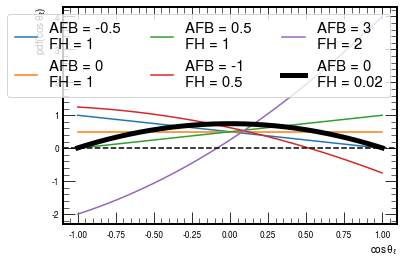

In [20]:
for afb,fh in zip([-0.5, 0, 0.5, -1, 3], 
                     [1, 1,   1,0.5, 2]):
  AFB.set_value(afb)
  FH.set_value(fh)
  plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {afb}\nFH = {fh}')


AFB.set_value(0), FH.set_value(0.02)
plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {0}\nFH = {0.02}', linewidth=5, color='black', ls='-')

plt.legend(frameon=True, ncol=3, fontsize=15)
plt.axhline(0, color='black', ls='--')
plt.ylabel(r'pdf($\cos\theta_{\ell}$)')
plt.xlabel(r'$\cos\theta_{\ell}$')

In [21]:
AFB.set_value(0), FH.set_value(0.02)
#AFB.set_value(0), FH.set_value(1)
sampler = decay_rate.create_sampler(sampler_size, )
sampler.resample()

(array([ 819., 2129., 3331., 4304., 5219., 5954., 6550., 7061., 7351.,
        7481., 7332., 7244., 6981., 6466., 5969., 5180., 4282., 3353.,
        2143.,  851.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

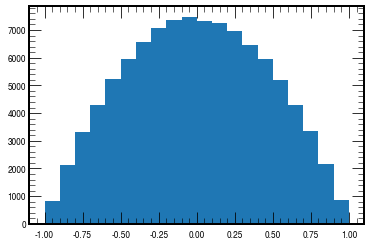

In [22]:
plt.hist(sampler.numpy(), bins=20, range=[-1,1])

'decayWidth' object has no attribute 'models'


(array([ 819., 2129., 3331., 4304., 5219., 5954., 6550., 7061., 7351.,
        7481., 7332., 7244., 6981., 6466., 5969., 5180., 4282., 3353.,
        2143.,  851.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

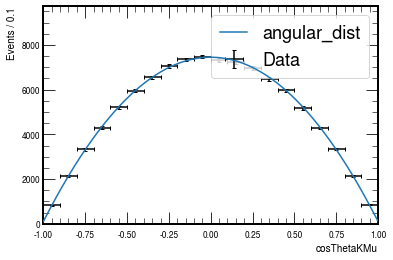

In [23]:
plot_tools.plot_model(sampler.numpy(), decay_rate, 
                      bins=20, density=True)

In [24]:
# Declared this variable
º = sampler.numpy()

In [25]:
# No tiene subclase float64 en este caso, posiblemente por el sistema operativo o hardware
np.float

/tmp/ipykernel_182/3998914936.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.float


float

'decayWidth' object has no attribute 'models'


((array([ 819., 2129., 3331., 4304., 5219., 5954., 6550., 7061., 7351.,
         7481., 7332., 7244., 6981., 6466., 5969., 5180., 4282., 3353.,
         2143.,  851.]),
  array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
          0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])),
 10.850758827699847)

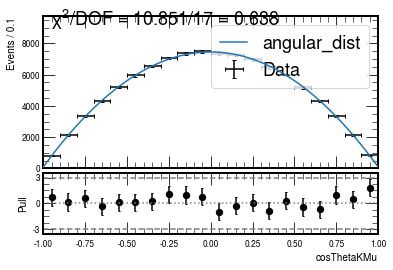

In [26]:
from matplotlib._api import check_in_list
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
plot_tools.plot_model(º, decay_rate, bins=20, 
                  axis=axes[0], pulls=True, axis_pulls=axes[1], 
                  chi_x=0.02, chi_y=0.9)

In [27]:
import SLSQPv2

ImportError: attempted relative import with no known parent package

In [ ]:
decay_rate.params

In [ ]:
# Manually creating a constraint


In [ ]:
constraints = SLSQPv2.create_constraint(decay_rate) #una constraint se crea con una pdf
# Constraints are a dictionary with 'type' and 'fun' arguments
# Creates a new minimizer implementation from the base minimizer
SLSQP = SLSQPv2.SLSQP(constraints=constraints)

In [ ]:
nll = zfit.loss.UnbinnedNLL(decay_rate, sampler)

In [ ]:
nll.get_params()

In [ ]:
nll.value()

In [ ]:

# Notebook setup
! pip install mplhep > /dev/null
! pip install zfit[nlopt] > /dev/null
! pip install zfit==0.16.0 > /dev/null
# Installing the latest stable version of zfit
#!pip install mplhep
! pip install seaborn > /dev/null
! pip install install numpy==1.22 > /dev/null
# Importing python libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import sys
from pathlib import Path
from matplotlib._api import check_in_list

# Google Colab

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('drive/MyDrive/colab2021/scripts')

# # in jupyter (lab / notebook), based on notebook path
# module_path = str(Path.cwd().parents[0] / "py")

# if module_path not in sys.path:
#     sys.path.append(module_path)

# Importing custom libraries
import plot_tools
import zfit
import customPDFs
# Zfit setup
# Setting the seed for zfit
zfit.settings.set_seed(seed=42, numpy=True, backend=True)
cos = zfit.Space('cosThetaKMu', [-1,1])
AFB = zfit.Parameter('AFB', 0)
FH = zfit.Parameter('FH', 0.002)
decay_rate = customPDFs.decayWidth(AFB, FH, cos) # Crea una PDF del Base PDF de zfit
cos_np = np.linspace(-1, 1, 1000)
AFB.set_value(0), FH.set_value(0.02)
sampler = decay_rate.create_sampler(100000) # Sets n parameter in the sampler class
# sampler.resample() # Generates the sample, running it again changes the sample
## Plotting the model and sample
plt.hist(sampler.numpy(), bins=20, range=[-1,1])
plot_tools.plot_model(sampler.numpy(), decay_rate,
                      bins=20, density=True)
# Declared this variable
º = sampler.numpy()
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
plot_tools.plot_model(º, decay_rate, bins=20,
                  axis=axes[0], pulls=True, axis_pulls=axes[1],
                  chi_x=0.02, chi_y=0.9)

# Minimizing
## NLOpt implementation
nlopt_min = zfit.minimize.NLoptSLSQPV1()
# Creating the loss function
nll = zfit.loss.UnbinnedNLL(decay_rate, sampler)
start = time.time()
nlopt_minimization = nlopt_min.minimize(nll)
end = time.time()
print("Minimization time with NLOpt", end - start)
nlopt_minimization
start = time.time()
nlopt_minimization.hesse()
end = time.time()
print("Hessian errors time with NLOpt", end - start)
## Minuit
# Doing the same but with Minuit

start = time.time()
# Minimization with zfit minuit

MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)


end = time.time()
print("Minimization time with Minuit", end - start)

start = time.time()
minimum.hesse()
end = time.time()

print("Hessian errors time with Minuit", end - start)
minimum
# Notebook setup
! pip install mplhep > /dev/null
! pip install zfit[nlopt] > /dev/null
! pip install zfit==0.16.0 > /dev/null
# Installing the latest stable version of zfit
#!pip install mplhep
! pip install seaborn > /dev/null
! pip install install numpy==1.22 > /dev/null
# Importing python libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import sys
from pathlib import Path
from matplotlib._api import check_in_list

# Google Colab

from google.colab import drive
drive.mount('/content/drive')
sys.path.append('drive/MyDrive/colab2021/scripts')

# # in jupyter (lab / notebook), based on notebook path
# module_path = str(Path.cwd().parents[0] / "py")

# if module_path not in sys.path:
#     sys.path.append(module_path)

# Importing custom libraries
import plot_tools
import zfit
import customPDFs
# Zfit setup
# Setting the seed for zfit
zfit.settings.set_seed(seed=42, numpy=True, backend=True)
cos = zfit.Space('cosThetaKMu', [-1,1])
AFB = zfit.Parameter('AFB', 0)
FH = zfit.Parameter('FH', 0.002)
decay_rate = customPDFs.decayWidth(AFB, FH, cos) # Crea una PDF del Base PDF de zfit
cos_np = np.linspace(-1, 1, 1000)
AFB.set_value(0), FH.set_value(0.02)
sampler = decay_rate.create_sampler(100000) # Sets n parameter in the sampler class
# sampler.resample() # Generates the sample, running it again changes the sample
## Plotting the model and sample
plt.hist(sampler.numpy(), bins=20, range=[-1,1])
plot_tools.plot_model(sampler.numpy(), decay_rate,
                      bins=20, density=True)
# Declared this variable
º = sampler.numpy()
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
plot_tools.plot_model(º, decay_rate, bins=20,
                  axis=axes[0], pulls=True, axis_pulls=axes[1],
                  chi_x=0.02, chi_y=0.9)

# Minimizing
## NLOpt implementation
nlopt_min = zfit.minimize.NLoptSLSQPV1()
# Creating the loss function
nll = zfit.loss.UnbinnedNLL(decay_rate, sampler)
start = time.time()
nlopt_minimization = nlopt_min.minimize(nll)
end = time.time()
print("Minimization time with NLOpt", end - start)
nlopt_minimization
start = time.time()
nlopt_minimization.hesse()
end = time.time()
print("Hessian errors time with NLOpt", end - start)
## Minuit
# Doing the same but with Minuit

start = time.time()
# Minimization with zfit minuit

MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)


end = time.time()
print("Minimization time with Minuit", end - start)

start = time.time()
minimum.hesse()
end = time.time()

print("Hessian errors time with Minuit", end - start)
minimum



In [ ]:
minimum

In [ ]:
start = time.time()

minimum = SLSQP.minimize(nll)
# Esto devolvía un error al correr en versiones anteriores
# El error indica lo siguiente:
# NotImplementedError: Cannot convert a symbolic Tensor 
# (gradients/gradients/AddN_16/inputs_1_grad/sub:0) to a numpy array. 
# This error may indicate that you're trying to pass a Tensor to a 
# NumPy call, which is not supported

# Solución encontrada en Stack Overflow:
# https://stackoverflow.com/questions/58479556/notimplementederror-cannot-convert-a-symbolic-tensor-2nd-target0-to-a-numpy

# numpy==1.19.5
end = time.time()
print("Minimization time with SLSQP zfit 0.16.0", end - start)

start = time.time()
minimum.hesse()

end = time.time()
print("Hessian errors time with SLSQP zfit 0.16.0", end - start)



In [ ]:
minimum

In [ ]:
start = time.time()

# Anotehr minimization with minuit
minuit = zfit.minimize.Minuit()
minimum_minuit = minuit.minimize(nll)

end = time.time()
print("Minimization time with Minuit zfit 0.16.0", end - start)

start = time.time()
minimum_minuit.hesse()

end = time.time()
print("Hessian errors time with Minuit zfit 0.16.0", end - start)

In [ ]:
minimum_minuit

In [ ]:
minimum

In [ ]:
from matplotlib._api import check_in_list
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
plot_tools.plot_model(sampler.numpy(), decay_rate, bins=20, 
                  axis=axes[0], pulls=True, axis_pulls=axes[1], 
                chi_x=0.02, chi_y=0.9, print_params=minimum, 
                data_kwargs = {'capsize': 3, 'color': 'black', 'ms':3, 'marker':'s'},
                params_text_opts={'x':0.4, 'y':0.2, 'ncol':1, 'fontsize': 15})
#axes[0].set_yscale('log')
#axes[0].set_ylim(1e5, 1e6)